In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display,Markdown

In [ ]:
epl = pd.read_csv('EPL.csv')
print(epl.info())
print(epl.head())

epl_condensed = epl[['Season','Team','Pos','Pts','GF','GD', 'Qualification or relegation']]

In [ ]:
def update_result(result):
    if 'Champions League' in result:
        result='Champions League'
    elif 'Europa' in result:
        result='Europa'
    elif 'Relegation' in result:
        result='Relegated'
    else:
        result = '-'
    return result

In [ ]:
epl_condensed = epl_condensed.rename(columns={'Qualification or relegation':'Result'})
epl_condensed['Result'] = epl_condensed['Result'].apply(update_result)
print(epl_condensed['Result'].value_counts())

In [ ]:
cl_qual =epl_condensed[epl_condensed.Result == 'Champions League']
cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
print(cl_qual_stats)

In [ ]:
eu_qual =epl_condensed[epl_condensed.Result == 'Europa']
eu_qual_stats = eu_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
print(eu_qual_stats)

In [ ]:
epl_winners = epl_condensed[epl_condensed['Pos']==1]
epl_winners = epl_winners.reset_index(drop=True)

relegation_zone = epl_condensed[epl_condensed['Pos']==18]
relegation_zone = relegation_zone.reset_index(drop=True)


In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Season', y='Pts', data=epl_winners, marker='o', color='#38003c' , label='Winner')
sns.lineplot(x='Season', y='Pts', data=relegation_zone, marker='o', color='#e90052' , label='relegation')

plt.xticks(rotation=90)
plt.title("Points of EPL winners and Relegated teams")
plt.xlabel('Seasons')
plt.ylabel('Points Scored')

plt.show()

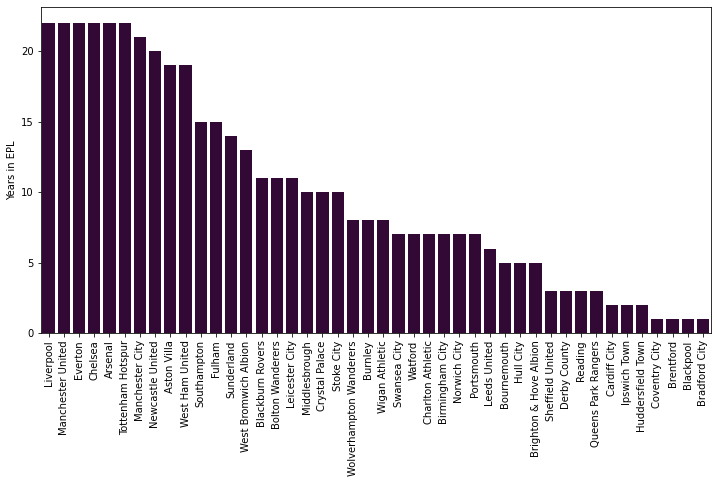

In [154]:
team_counts = epl_condensed['Team'].value_counts()

euro_ids = epl_condensed['Result'].isin(['Europa','Champtions League'])

euro_year_counts = epl_condensed[euro_ids]['Team'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=team_counts.index,y=team_counts.values, color='#38003c')
plt.ylabel('Years in EPL')
plt.xticks(rotation=90)
plt.show()